### Flight Price Prediction
#### By Adebola Orogun.

This project is aimed at building a machine learning model that predicts the price of flights using different flight parameters such as Airline, Destination, Source, Number of stops, duration, etc. 
The steps taken to complete this project inculde;
1. Exploratory data analysis
2. Feature engineering
    * Handling Categorical variables
    * Handling Numerical variables (feature scaling)
3. Feature selection
4. Model building
5. Hyperparameter optimization
6. Saving and loading model

In [1]:
# Importing the necessary libraries.
import pandas as pd # Pandas is used for data manipulation and exploration
import numpy as np # Numpy is used for data manipulation and has capacities for numerical computations
import seaborn as sns # Seaborn is used to create visualization from the data built from matplotlib
import matplotlib.pyplot as plt # Matplotlib helps to create visualizations also.
sns.set()

In [2]:
# Importing the flight price dataset
dataset = pd.read_excel("./data/Flight_price.xlsx")
data = dataset.copy() # Making a copy of the imported data to keep for reference whilst making computations on the copy
data.head() # View the first 5 rows of the data.

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
#Setting the pandas library to remove restrictions on the number of columns to be displayed
pd.options.display.max_columns = None

#### Checking for missing values in columns

In [6]:
data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
# Dropping the rows with missing values in the dataset.
data = data.dropna()

#### Handling date and time features in the dataset.

Since we have to represent the data in numerical formats, traditional date and time columns needs to manipulated to represent them in numerical formats.
This includes seperating the hours, minutes, day and month features of each date and time column into a seperate column.
(Journey day, Dep_Time, Arrival_time, Duration) are the columns involved in this section of project.

In [14]:
data["journey_day"] = pd.to_datetime(data.Date_of_Journey).dt.day # Extracting the journey day into a seperate column.
data["journey_month"] = pd.to_datetime(data.Date_of_Journey).dt.month #Extracting the journey month into a seperate column.
data.drop("Date_of_Journey", axis=1, inplace=True) # Removing the original Date of journey column.
data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


In [15]:
data["dep_hour"] = pd.to_datetime(data["Dep_Time"]).dt.hour # Extracting the hour feature from the departure time column.
data["dep_min"] = pd.to_datetime(data["Dep_Time"]).dt.minute #Extracting the minute feature from the departure time column.
data.drop("Dep_Time", axis=1, inplace=True) #Dropping the original departure time column.

In [16]:
data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [17]:
data["arrival_hour"] = pd.to_datetime(data["Arrival_Time"]).dt.hour # Extracting the hour component from the arrival time column
data["arrival_minute"] = pd.to_datetime(data["Arrival_Time"]).dt.minute # Extracting the minute component from the arrival time
data.drop("Arrival_Time", axis=1, inplace=True) # Dropping the arrival time column
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


#### Completing the durations and extracting hours and minutes from the Duration column

The next cell of code helps to complete the duration column. This is because the values in the column do not follow a uniform convection i.e some are represented as only hours e.g 1h while some are represented as only minutes e.g 50m and some are represented in both hour and minutes e.g 1h 23m.

The situation above must be corrected before we can move forward in the process of applying machine learning to the project.

In [18]:
duration = [x for x in data["Duration"]] # Getting all the values in the duration column in the dataset into a list.

for i in range(len(duration)): # A loop in the range of length of values in the duration list.
    if len(duration[i].split()) != 2: # Checks if the number of component in each datapoint after spliting by " " is less than 2
        if "h" in duration[i]: # Checks if the hour component of the duration is represented. i.e if h in the duration value.
            duration[i] = duration[i].strip() + " 0m" # Adds 0 minutes to the duration if it only contains the hour component
            
        else:
            duration[i] = "0h " +  duration[i] # Adds 0 hours to the time if it only contains the minute component.
            
# Creating a new list to contain values for just the hour and minute component of the duration
# This makes it easier to create a new column for both component.
duration_hour = []
duration_min = []

## The block of code below loops through the modified duration list and seperate each data points into the hour and minute component
## Then assign them to seperate lists and later creates a new column in the data using the new lists. 
for i in range(len(duration)):
    duration_hour.append(int(duration[i].split("h")[0]))
    duration_min.append(int(duration[i].split("m")[0].split()[-1]))
    
data["duration_hours"] = duration_hour
data["duration_mins"] = duration_min

data.drop("Duration", axis=1, inplace=True)

data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


#### Handling Categorical variables

Categorical variables will handled using both label encoder and One Hot encoder techniques. 

The number of stops column will be handled using the label encoder method while others like source, destination and airline will be represented using the One hot encoding.

In [20]:
airline = data[["Airline"]] # Extracting the airline column into a new variable.

current_airline_list = airline["Airline"]
new_airline = []

# Due to the number of different airlines in the dataset, we will represent the rarely represented airlines using a common tag
# I intend to use "Other" to represent them, this helps to reduce the number of columsn created when I apply the one hot endocing technique.
# The for-loop below implements that.
for carrier in current_airline_list:
    if carrier in ["Jet Airways", "IndiGo", "Air India", "SpiceJet", "Multiple carriers", "GoAir", "Vistara", "Air Asia"]:
        new_airline.append(carrier)
    else:
        new_airline.append("Other")
        
airline["Airline"] = pd.DataFrame(new_airline) # Assigning the modified airline column to a column in the dataset.
airline["Airline"].value_counts()

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


Jet Airways          3849
IndiGo               2053
Air India            1750
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Other                  23
Name: Airline, dtype: int64

I will be applying one hot encoding to the columns stated above in the following steps.

In [21]:
airline = pd.get_dummies(airline, drop_first=True)
airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara
0,0,0,1,0,0,0,0,0
1,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0


In [23]:
source = data[["Source"]]
source = pd.get_dummies(source, drop_first=True)
source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [52]:
dataset.Destination.value_counts()

Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In the Destination column in the dataset, we have Delhi and New Delhi referring to the same destination. The block of code below replaces all occurence of New Delhi with Delhi. Then generates the one hot encoded representation of the destination column.

In [25]:
Destination = data[["Destination"]]
Current_Destination_List = Destination['Destination']
New_Destination_List = []

for value in Current_Destination_List:
    if value in ['New Delhi']:
        New_Destination_List.append('Delhi')
    else:
        New_Destination_List.append(value)

Destination['Destination'] = pd.DataFrame(New_Destination_List)

Destination = pd.get_dummies(Destination, drop_first = True)
Destination.head()

C:\Users\user\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,1,0,0
1,0,0,0,0
2,1,0,0,0
3,0,0,0,0
4,0,1,0,0


In [26]:
# Here I am dropping the Route column because the same information represented in this column is also depicted in 
# Number of stops column and also additional information column because there is a lot of "no-info" which does not help our course
data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [27]:
data["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [28]:
# Label encoding the number of stop column and representing each class with the same number of stops for easy computation.
data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)
data.head()

,Airline,Source,Destination,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_minute,duration_hours,duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,3,1,16,50,21,35,4,45


In [29]:
# SInce we have successfully handled the categorical variables in the dataset, it is time to bring all the columns into the dataset
# Then we drop the original columns from the data.
data_train = pd.concat([data, airline, source, Destination], axis = 1) # axis = 1 signifies column
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

data_train.head()

,Total_Stops,Price,journey_day,journey_month,dep_hour,dep_min,arrival_hour,arrival_minute,duration_hours,duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Multiple carriers,Airline_Other,Airline_SpiceJet,Airline_Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2,7662,5,1,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,13882,6,9,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,1,6218,5,12,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,13302,3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


#### Feature Selection

Training machine learning models, we need two important components i.e Dependent and Independent components.
Here we are going to seperate the Dependent variable which is the price column and the Independent columns which are the remaining columns. They are stored and y and X respectively.

In [55]:
X = data_train.drop("Price", axis=1)
y = data_train["Price"]

#### Feature Importance

Some of the features in the dataset are not of great importance, this section investigates those columns and we will try to remove them.

In [56]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor() # This package has the functionality to show the importance of each feature to the predicted price.
selection.fit(X, y) # We instantiated the model above and it is applied to the dataset with this line of code.

print(selection.feature_importances_)

[0.23016236 0.1184209  0.08316174 0.03199468 0.02742004 0.03684209
 0.02847017 0.14919225 0.02342737 0.00705408 0.00234406 0.00996716
 0.10457532 0.01471129 0.0244576  0.0041764  0.004664   0.00099093
 0.03070402 0.01292917 0.01619809 0.0083691  0.0235625  0.00355186
 0.00265281]


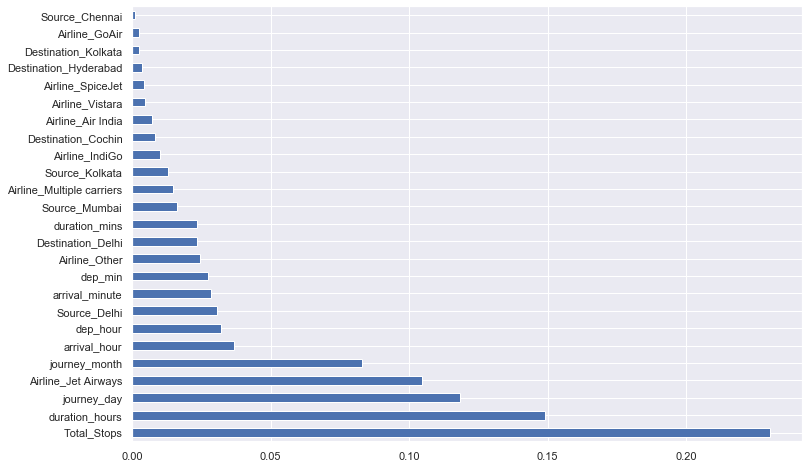

In [57]:
#The line of codes below helps to generate a visual representation of the feature importance values generated above.
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

#### Checking VIF-Multicollinearity => Variable Inflation Factor 

In regression tasks, it is important to check for multicollinearity in the dataset as this may lead to reduction in the optimization of the model and data leakage. 

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(z):
    vif = pd.DataFrame()
    vif["variables"] = z.columns
    vif["VIF"] = [variance_inflation_factor(z.values, i) for i in range(z.shape[1])]
    return(vif)

In [59]:
# Compute VIF on X
calc_vif(X).sort_values("VIF", ascending=False)

,variables,VIF
18,Source_Delhi,11.024171
21,Destination_Cochin,8.887337
12,Airline_Jet Airways,8.863438
0,Total_Stops,7.491920
19,Source_Kolkata,6.281070
7,duration_hours,6.072414
3,dep_hour,5.688981
11,Airline_IndiGo,5.025643
5,arrival_hour,4.864621
9,Airline_Air India,4.771296


Source_Delhi has the highest multicollinearity which means it is bad for the model. Hence it needs to removed from the model. 

In [60]:
X = data_train.drop(["Price", "Source_Delhi"], axis=1)
y = data_train["Price"]

### Fit model - Random Forest

The steps in this section includes;

1. Split dataset into train and test sets

2. Train Model

3. Evaluate Model Performance

I am not doing feature scaling because the model to be used is RandomForestRegressor and it does not need scaling to generalize on the dataset.

In [36]:
from sklearn.model_selection import train_test_split
# The dataset is splitted into training and test datasets using 20% of the entire data for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()  # Instantiating the RandomForestRegressor model as rf_reg
rf_reg.fit(X_train, y_train) # This can also be interpreted as training on the dataset.

RandomForestRegressor()

#### Model Performance

In [38]:
# Checking the performance of the model on the dataset using the R2 score metric which check the generalization of the model on the dataset
print('Model Performance on Training Set:', round(rf_reg.score(X_train, y_train)*100,2))
print('Model Performance on Test Set:', round(rf_reg.score(X_test, y_test)*100,2))

Model Performance on Training Set: 95.17
Model Performance on Test Set: 76.7


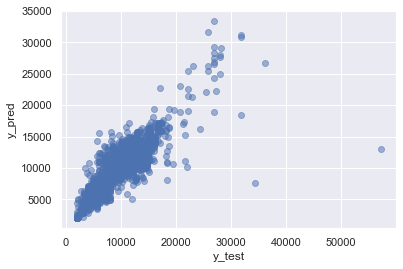

In [39]:
# Plotting the predicted and expected values to see how close the model was to accurate prediction.
y_pred = rf_reg.predict(X_test)
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [41]:
# Using other metrics to evauate the model's performace
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred)) # Mean absolute error
print('MSE:', metrics.mean_squared_error(y_test, y_pred)) # Mean square error
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred))) #Root mean squared error

MAE: 1319.7041972365882
MSE: 5023997.049208022
RMSE: 2241.4274579401454


#### Hyperparameter Tuning

This section helps us to search a range of training parameters which helps the model learn best.

The steps to be taken include;

1. Selection of search algorithm: RandomizedSearchCV is the best because it is faster. 

2. Assign range of hyperparameters in form of dictionary

3. Fit the search algorithm to the data and provide the parameter dictionary

4. Check best paramters and evaluate it's accuracy.

In [44]:
from sklearn.model_selection import RandomizedSearchCV

In [45]:
#Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [46]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [47]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf_reg, param_distributions = random_grid,
                               scoring='neg_mean_squared_error', n_iter = 10, cv = 5, 
                               verbose=2, random_state=42, n_jobs = 1)

In [48]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  12.6s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.9s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  10.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=  11.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 
[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=  17.4s
[CV] n_estimators=1100, min_samples_split=10, mi

[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   5.6s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   6.6s
[CV] n_estimators=700, min_samples_split=15, min_sam

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 18.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [49]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

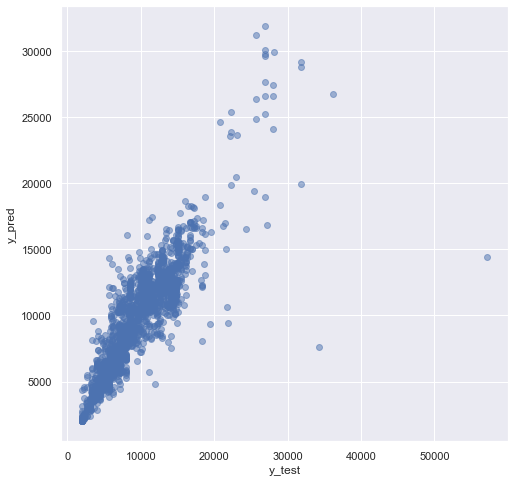

In [50]:
# Plot Performance Chart
prediction = rf_random.predict(X_test)
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [51]:
# RMSE/(max(DV)-min(DV))
print('R2 value: ', round(metrics.r2_score(y_test, prediction),2))
print('RMSE: ', round(np.sqrt(metrics.mean_squared_error(y_test, prediction)),2))
print('Normalized RMSE: ', round(np.sqrt(metrics.mean_squared_error(y_test, prediction))/(max(y_test)-min(y_test)),2))
print('Max Value: ', max(y_test), '\nMin Value: ', min(y_test))

R2 value:  0.78
RMSE:  2168.34
Normalized RMSE:  0.04
Max Value:  57209 
Min Value:  1965


In [43]:
import pickle
# open a file, where you ant to store the data
file = open('./flight_price_prediction.pkl', 'wb')
# dump information to that file
pickle.dump(rf_reg, file)